# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['meulaboh',
 'san jose',
 'nikolskoye',
 'preobrazhenskaya',
 'tiksi',
 'rikitea',
 'hobyo',
 'saskylakh',
 'luderitz',
 'krasnaya gora',
 'longyearbyen',
 'den helder',
 'taolanaro',
 'lavrentiya',
 'prince rupert',
 'tasiilaq',
 'caborca',
 'cabo san lucas',
 'aberdeen',
 'ushuaia',
 'ancud',
 'mbanza-ngungu',
 'codrington',
 'tuatapere',
 'busselton',
 'gimli',
 'bredasdorp',
 'barpali',
 'araouane',
 'dikson',
 'vaini',
 'san quintin',
 'yellowknife',
 'new norfolk',
 'port alfred',
 'temaraia',
 'yanchukan',
 'georgetown',
 'los llanos de aridane',
 'ponta do sol',
 'olafsvik',
 'jamestown',
 'barrow',
 'cabra',
 'chuy',
 'ilulissat',
 'amderma',
 'fortuna',
 'east london',
 'albany',
 'puerto ayora',
 'sao filipe',
 'hermanus',
 'norman wells',
 'belushya guba',
 'luba',
 'takoradi',
 'kruisfontein',
 'mataura',
 'lagoa',
 'alekseyevka',
 'castro',
 'cape town',
 'raudeberg',
 'illoqqortoormiut',
 'kapaa',
 'oistins',
 'pisco',
 'provideniya',
 'port elizabeth',
 'faanui',
 'bat

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#api.openweathermap.org/data/2.5/weather?q=London 
#this is an example of the output formatting from documentation

In [4]:
city_info = []
for x in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key
    

    try: 
        api_url = url+"&q="+x
        result = requests.get(api_url).json()
        latitude = result["coord"]["lat"]
        longitude = result["coord"]["lon"]
        temperature = result["main"]["temp"]
        humidity = result["main"]["humidity"]
        cloudiness = result["clouds"]["all"]
        
        
        city_info.append({"latitude" : latitude, "longitude" : longitude, "temperature" : temperature,
                          "humidity" : humidity, "cloudiness" : cloudiness})
        time.sleep(1)
        print(result)
    except:
        print("skip")
        

{'coord': {'lon': 96.13, 'lat': 4.14}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 82.26, 'feels_like': 87.94, 'temp_min': 82.26, 'temp_max': 82.26, 'pressure': 1013, 'humidity': 80, 'sea_level': 1013, 'grnd_level': 1012}, 'wind': {'speed': 8.75, 'deg': 51}, 'rain': {'3h': 1.38}, 'clouds': {'all': 100}, 'dt': 1579544476, 'sys': {'country': 'ID', 'sunrise': 1579564132, 'sunset': 1579607029}, 'timezone': 25200, 'id': 1214488, 'name': 'Meulaboh', 'cod': 200}
{'coord': {'lon': -121.89, 'lat': 37.34}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 48.25, 'feels_like': 43.93, 'temp_min': 44.01, 'temp_max': 53.6, 'pressure': 1018, 'humidity': 81}, 'visibility': 14484, 'wind': {'speed': 4.7, 'deg': 170}, 'clouds': {'all': 90}, 'dt': 1579544558, 'sys': {'type': 1, 'id': 5845, 'country': 'US', 'sunrise': 1579533525, 'sunset': 1579569471}, 

{'coord': {'lon': -2.1, 'lat': 57.14}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 41.94, 'feels_like': 34.81, 'temp_min': 39, 'temp_max': 46.99, 'pressure': 1036, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 160}, 'clouds': {'all': 17}, 'dt': 1579544488, 'sys': {'type': 1, 'id': 1440, 'country': 'GB', 'sunrise': 1579509022, 'sunset': 1579536463}, 'timezone': 0, 'id': 2657832, 'name': 'Aberdeen', 'cod': 200}
{'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 51.8, 'feels_like': 37.15, 'temp_min': 51.8, 'temp_max': 51.8, 'pressure': 1003, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 23.04, 'deg': 230}, 'clouds': {'all': 40}, 'dt': 1579544090, 'sys': {'type': 1, 'id': 8303, 'country': 'AR', 'sunrise': 1579509055, 'sunset': 1579568212}, 'timezone': -10800, 

{'coord': {'lon': 26.89, 'lat': -33.59}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 63, 'feels_like': 63.1, 'temp_min': 63, 'temp_max': 63, 'pressure': 1016, 'humidity': 87}, 'wind': {'speed': 5.01, 'deg': 75, 'gust': 11.99}, 'rain': {'3h': 0.19}, 'clouds': {'all': 94}, 'dt': 1579544370, 'sys': {'type': 3, 'id': 2011314, 'country': 'ZA', 'sunrise': 1579490516, 'sunset': 1579541051}, 'timezone': 7200, 'id': 964432, 'name': 'Port Alfred', 'cod': 200}
skip
skip
{'coord': {'lon': 100.34, 'lat': 5.41}, 'weather': [{'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11n'}], 'base': 'stations', 'main': {'temp': 83.34, 'feels_like': 86.83, 'temp_min': 82, 'temp_max': 84.2, 'pressure': 1013, 'humidity': 66}, 'visibility': 9000, 'wind': {'speed': 8.05, 'deg': 30}, 'clouds': {'all': 20}, 'dt': 1579544372, 'sys': {'type': 1, 'id': 9438, 'country': 'MY', 'sunrise': 1579563233, 'sunset': 157960590

{'coord': {'lon': -126.83, 'lat': 65.28}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -18.4, 'feels_like': -28.61, 'temp_min': -18.4, 'temp_max': -18.4, 'pressure': 1008, 'humidity': 75}, 'visibility': 48279, 'wind': {'speed': 5.82, 'deg': 80}, 'clouds': {'all': 20}, 'dt': 1579544351, 'sys': {'type': 1, 'id': 951, 'country': 'CA', 'sunrise': 1579542967, 'sunset': 1579562401}, 'timezone': -25200, 'id': 6089245, 'name': 'Norman Wells', 'cod': 200}
skip
{'coord': {'lon': 8.55, 'lat': 3.46}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 93.11, 'temp_min': 86, 'temp_max': 86, 'pressure': 1008, 'humidity': 70}, 'visibility': 2800, 'wind': {'speed': 5.82, 'deg': 260}, 'clouds': {'all': 40}, 'dt': 1579544697, 'sys': {'type': 1, 'id': 2049, 'country': 'GQ', 'sunrise': 1579498680, 'sunset': 1579541692}, 'timezone': 3600, 'id': 2

{'coord': {'lon': 130.41, 'lat': 67.8}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': -17.34, 'feels_like': -24.79, 'temp_min': -17.34, 'temp_max': -17.34, 'pressure': 1015, 'humidity': 99, 'sea_level': 1015, 'grnd_level': 925}, 'wind': {'speed': 1.12, 'deg': 11}, 'clouds': {'all': 99}, 'dt': 1579544733, 'sys': {'country': 'RU', 'sunrise': 1579569875, 'sunset': 1579584828}, 'timezone': 32400, 'id': 2027042, 'name': 'Batagay-Alyta', 'cod': 200}
{'coord': {'lon': -70.92, 'lat': -53.15}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 59.09, 'feels_like': 51.67, 'temp_min': 57.2, 'temp_max': 60.8, 'pressure': 1005, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1579544457, 'sys': {'type': 1, 'id': 8487, 'country': 'CL', 'sunrise': 1579510199, 'sunset': 1579568326}, 'timezon

{'coord': {'lon': 114.16, 'lat': 22.29}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 62.83, 'feels_like': 61.27, 'temp_min': 57.99, 'temp_max': 64.99, 'pressure': 1022, 'humidity': 77}, 'visibility': 9000, 'wind': {'speed': 5.82, 'deg': 70}, 'clouds': {'all': 20}, 'dt': 1579544108, 'sys': {'type': 1, 'id': 9154, 'country': 'HK', 'sunrise': 1579561490, 'sunset': 1579601015}, 'timezone': 28800, 'id': 1819729, 'name': 'Hong Kong', 'cod': 200}
skip
{'coord': {'lon': 27.67, 'lat': 63.08}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 37.4, 'feels_like': 25.63, 'temp_min': 37.4, 'temp_max': 37.4, 'pressure': 1005, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 240}, 'clouds': {'all': 90}, 'dt': 1579544754, 'sys': {'type': 1, 'id': 1345, 'country': 'FI', 'sunrise': 1579504515, 'sunset': 1579526677}, 'timezon

{'coord': {'lon': -70.77, 'lat': -8.16}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 82.35, 'feels_like': 88.56, 'temp_min': 82.35, 'temp_max': 82.35, 'pressure': 1011, 'humidity': 69, 'sea_level': 1011, 'grnd_level': 983}, 'wind': {'speed': 3.56, 'deg': 7}, 'clouds': {'all': 98}, 'dt': 1579544773, 'sys': {'country': 'BR', 'sunrise': 1579516686, 'sunset': 1579561767}, 'timezone': -18000, 'id': 3661980, 'name': 'Tarauaca', 'cod': 200}
{'coord': {'lon': 111.62, 'lat': -2.68}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 73.63, 'feels_like': 80.42, 'temp_min': 73.63, 'temp_max': 73.63, 'pressure': 1012, 'humidity': 97, 'sea_level': 1012, 'grnd_level': 1010}, 'wind': {'speed': 4.05, 'deg': 275}, 'rain': {'3h': 1.62}, 'clouds': {'all': 100}, 'dt': 1579544774, 'sys': {'country': 'ID', 'sunrise': 1579559814, 'sunset': 1579603910}, 'timez

{'coord': {'lon': -45.24, 'lat': 60.14}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'model', 'main': {'temp': 26.1, 'feels_like': 13.53, 'temp_min': 26.1, 'temp_max': 26.1, 'pressure': 1008, 'humidity': 92, 'sea_level': 1008, 'grnd_level': 1002}, 'wind': {'speed': 14.18, 'deg': 129}, 'snow': {'3h': 0.88}, 'clouds': {'all': 100}, 'dt': 1579544793, 'sys': {'country': 'GL', 'sunrise': 1579520522, 'sunset': 1579545674}, 'timezone': -10800, 'id': 3421765, 'name': 'Nanortalik', 'cod': 200}
{'coord': {'lon': 17.69, 'lat': -14.66}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 68.31, 'feels_like': 71.51, 'temp_min': 68.31, 'temp_max': 68.31, 'pressure': 1010, 'humidity': 87, 'sea_level': 1010, 'grnd_level': 852}, 'wind': {'speed': 3.15, 'deg': 274}, 'rain': {'3h': 1.44}, 'clouds': {'all': 91}, 'dt': 1579544794, 'sys': {'country': 'AO', 'sunrise': 1579494842, 'sunset': 15

{'coord': {'lon': -49.67, 'lat': 61.99}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'model', 'main': {'temp': 22.44, 'feels_like': 3.83, 'temp_min': 22.44, 'temp_max': 22.44, 'pressure': 1003, 'humidity': 87, 'sea_level': 1003, 'grnd_level': 990}, 'wind': {'speed': 24.05, 'deg': 144}, 'snow': {'3h': 0.69}, 'clouds': {'all': 100}, 'dt': 1579544814, 'sys': {'country': 'GL', 'sunrise': 1579522456, 'sunset': 1579545868}, 'timezone': -10800, 'id': 3421193, 'name': 'Paamiut', 'cod': 200}
{'coord': {'lon': -17.34, 'lat': 66.04}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 33.8, 'feels_like': 14.04, 'temp_min': 33.8, 'temp_max': 33.8, 'pressure': 1005, 'humidity': 59}, 'visibility': 9000, 'wind': {'speed': 26.4, 'deg': 230, 'gust': 44.96}, 'clouds': {'all': 90}, 'dt': 1579544815, 'sys': {'type': 1, 'id': 83, 'country': 'IS', 'sunrise': 1579517348, 'sunset': 15795354

{'coord': {'lon': 44.4, 'lat': 33.34}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 51.8, 'feels_like': 48.16, 'temp_min': 51.8, 'temp_max': 51.8, 'pressure': 1020, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 290}, 'clouds': {'all': 4}, 'dt': 1579544834, 'sys': {'type': 1, 'id': 7597, 'country': 'IQ', 'sunrise': 1579493092, 'sunset': 1579530068}, 'timezone': 10800, 'id': 98182, 'name': 'Baghdad', 'cod': 200}
{'coord': {'lon': -2.32, 'lat': 57.33}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 42.08, 'feels_like': 34.99, 'temp_min': 37, 'temp_max': 48.99, 'pressure': 1036, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 160}, 'clouds': {'all': 19}, 'dt': 1579544835, 'sys': {'type': 1, 'id': 1440, 'country': 'GB', 'sunrise': 1579509141, 'sunset': 1579536449}, 'timezone': 0, 'id': 2641007,

{'coord': {'lon': 140.83, 'lat': 35.73}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 32.32, 'feels_like': 26.91, 'temp_min': 30, 'temp_max': 33.8, 'pressure': 1011, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 290}, 'clouds': {'all': 20}, 'dt': 1579544336, 'sys': {'type': 1, 'id': 7955, 'country': 'JP', 'sunrise': 1579556644, 'sunset': 1579593056}, 'timezone': 32400, 'id': 2112802, 'name': 'Hasaki', 'cod': 200}
{'coord': {'lon': -85.2, 'lat': 32.35}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 40.28, 'feels_like': 31.24, 'temp_min': 37.4, 'temp_max': 43, 'pressure': 1028, 'humidity': 41}, 'visibility': 16093, 'wind': {'speed': 6.93, 'deg': 330}, 'clouds': {'all': 1}, 'dt': 1579544855, 'sys': {'type': 1, 'id': 4765, 'country': 'US', 'sunrise': 1579524064, 'sunset': 1579561317}, 'timezone': -21600, 'id': 4

{'coord': {'lon': 57.66, 'lat': -20.01}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 80.8, 'feels_like': 86.54, 'temp_min': 80.6, 'temp_max': 81, 'pressure': 1009, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 8.34, 'deg': 350}, 'clouds': {'all': 40}, 'dt': 1579544878, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1579484714, 'sunset': 1579532080}, 'timezone': 14400, 'id': 934479, 'name': 'Grand Gaube', 'cod': 200}
{'coord': {'lon': 29.83, 'lat': 9.23}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 76.96, 'feels_like': 71.92, 'temp_min': 76.96, 'temp_max': 76.96, 'pressure': 1011, 'humidity': 24, 'sea_level': 1011, 'grnd_level': 966}, 'wind': {'speed': 4.16, 'deg': 13}, 'clouds': {'all': 65}, 'dt': 1579544879, 'sys': {'country': 'SS', 'sunrise': 1579494087, 'sunset': 1579536068}, 'timezone': 10800, '

{'coord': {'lon': 112.47, 'lat': 63.01}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'model', 'main': {'temp': -3.93, 'feels_like': -17, 'temp_min': -3.93, 'temp_max': -3.93, 'pressure': 1004, 'humidity': 91, 'sea_level': 1004, 'grnd_level': 964}, 'wind': {'speed': 11.63, 'deg': 225}, 'snow': {'3h': 0.19}, 'clouds': {'all': 100}, 'dt': 1579544616, 'sys': {'country': 'RU', 'sunrise': 1579570416, 'sunset': 1579592900}, 'timezone': 32400, 'id': 2025456, 'name': 'Chernyshevskiy', 'cod': 200}
{'coord': {'lon': 6.13, 'lat': 62.58}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 47.93, 'feels_like': 26.2, 'temp_min': 46, 'temp_max': 50, 'pressure': 1018, 'humidity': 93}, 'visibility': 6000, 'wind': {'speed': 36.91, 'deg': 230, 'gust': 51.67}, 'clouds': {'all': 75}, 'dt': 1579544899, 'sys': {'type': 1, 'id': 1602, 'country': 'NO', 'sunrise': 1579509396, 'sunset': 15795

{'coord': {'lon': -50.21, 'lat': -30.18}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'model', 'main': {'temp': 76.6, 'feels_like': 73.17, 'temp_min': 76.6, 'temp_max': 76.6, 'pressure': 1012, 'humidity': 83, 'sea_level': 1012, 'grnd_level': 1012}, 'wind': {'speed': 20.6, 'deg': 46}, 'clouds': {'all': 19}, 'dt': 1579544917, 'sys': {'country': 'BR', 'sunrise': 1579509473, 'sunset': 1579559109}, 'timezone': -10800, 'id': 3466165, 'name': 'Cidreira', 'cod': 200}
{'coord': {'lon': 27, 'lat': -5.38}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 72.18, 'feels_like': 78.69, 'temp_min': 72.18, 'temp_max': 72.18, 'pressure': 1009, 'humidity': 87, 'sea_level': 1009, 'grnd_level': 939}, 'wind': {'speed': 0.31, 'deg': 130}, 'rain': {'3h': 0.13}, 'clouds': {'all': 96}, 'dt': 1579544918, 'sys': {'country': 'CD', 'sunrise': 1579493466, 'sunset': 1579538048}, 'timezone': 7200,

{'coord': {'lon': -0.4, 'lat': 54.28}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 40.71, 'feels_like': 34.65, 'temp_min': 37.99, 'temp_max': 42.8, 'pressure': 1042, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 240}, 'clouds': {'all': 40}, 'dt': 1579544669, 'sys': {'type': 1, 'id': 1515, 'country': 'GB', 'sunrise': 1579507716, 'sunset': 1579536953}, 'timezone': 0, 'id': 2638419, 'name': 'Scarborough', 'cod': 200}
{'coord': {'lon': 158.65, 'lat': 53.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 1.4, 'feels_like': -10.17, 'temp_min': 1.4, 'temp_max': 1.4, 'pressure': 1006, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 8.95, 'deg': 10}, 'clouds': {'all': 100}, 'dt': 1579544937, 'sys': {'type': 1, 'id': 8887, 'country': 'RU', 'sunrise': 1579555565, 'sunset': 1579585580}, 'timezone': 

{'coord': {'lon': -39.92, 'lat': -2.92}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 87.67, 'feels_like': 90.55, 'temp_min': 87.67, 'temp_max': 87.67, 'pressure': 1009, 'humidity': 59, 'sea_level': 1009, 'grnd_level': 1005}, 'wind': {'speed': 9.84, 'deg': 49}, 'rain': {'3h': 0.13}, 'clouds': {'all': 90}, 'dt': 1579544955, 'sys': {'country': 'BR', 'sunrise': 1579509750, 'sunset': 1579553892}, 'timezone': -10800, 'id': 3393692, 'name': 'Itarema', 'cod': 200}
{'coord': {'lon': -135.01, 'lat': 68.22}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -20.2, 'feels_like': -29.2, 'temp_min': -20.2, 'temp_max': -20.2, 'pressure': 1006, 'humidity': 75}, 'visibility': 24140, 'wind': {'speed': 3.65, 'deg': 149}, 'clouds': {'all': 40}, 'dt': 1579544489, 'sys': {'type': 1, 'id': 796, 'country': 'CA', 'sunrise': 1579547755, 'sunset': 1579561540

{'coord': {'lon': -80.61, 'lat': 51.26}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 6.8, 'feels_like': -6.84, 'temp_min': 6.8, 'temp_max': 6.8, 'pressure': 1024, 'humidity': 60}, 'visibility': 2414, 'wind': {'speed': 12.75, 'deg': 300, 'gust': 21.92}, 'clouds': {'all': 1}, 'dt': 1579544975, 'sys': {'type': 1, 'id': 860, 'country': 'CA', 'sunrise': 1579526156, 'sunset': 1579557022}, 'timezone': -18000, 'id': 6078372, 'name': 'Moose Factory', 'cod': 200}
{'coord': {'lon': 40.92, 'lat': 34.45}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'model', 'main': {'temp': 53.02, 'feels_like': 47.16, 'temp_min': 53.02, 'temp_max': 53.02, 'pressure': 1020, 'humidity': 70, 'sea_level': 1020, 'grnd_level': 996}, 'wind': {'speed': 7.74, 'deg': 345}, 'clouds': {'all': 31}, 'dt': 1579544976, 'sys': {'country': 'SY', 'sunrise': 1579494070, 'sunset': 1579530761}, 'timezo

{'coord': {'lon': 170.97, 'lat': -42.72}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'model', 'main': {'temp': 59.31, 'feels_like': 58.86, 'temp_min': 59.31, 'temp_max': 59.31, 'pressure': 1015, 'humidity': 90, 'sea_level': 1015, 'grnd_level': 1015}, 'wind': {'speed': 4.34, 'deg': 92}, 'clouds': {'all': 42}, 'dt': 1579544996, 'sys': {'country': 'NZ', 'sunrise': 1579540961, 'sunset': 1579594269}, 'timezone': 46800, 'id': 2206894, 'name': 'Hokitika', 'cod': 200}
{'coord': {'lon': -34.81, 'lat': -7.47}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 87.8, 'feels_like': 82.87, 'temp_min': 87.8, 'temp_max': 87.8, 'pressure': 1009, 'humidity': 45}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 140}, 'clouds': {'all': 20}, 'dt': 1579544997, 'sys': {'type': 1, 'id': 8391, 'country': 'BR', 'sunrise': 1579508116, 'sunset': 1579553073}, 'timezone': -10800

{'coord': {'lon': 12.78, 'lat': 26.59}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 57.27, 'feels_like': 46.9, 'temp_min': 57.27, 'temp_max': 57.27, 'pressure': 1022, 'humidity': 27, 'sea_level': 1022, 'grnd_level': 959}, 'wind': {'speed': 10.18, 'deg': 133}, 'clouds': {'all': 0}, 'dt': 1579545017, 'sys': {'country': 'LY', 'sunrise': 1579499882, 'sunset': 1579538459}, 'timezone': 7200, 'id': 2219235, 'name': 'Ubari', 'cod': 200}
{'coord': {'lon': 170.5, 'lat': -45.87}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 57, 'feels_like': 56.46, 'temp_min': 57, 'temp_max': 57, 'pressure': 1017, 'humidity': 93}, 'wind': {'speed': 3.71, 'deg': 91}, 'clouds': {'all': 100}, 'dt': 1579545018, 'sys': {'type': 3, 'id': 75281, 'country': 'NZ', 'sunrise': 1579540471, 'sunset': 1579594984}, 'timezone': 46800, 'id': 2191562, 'name': 'Dunedin', 'c

{'coord': {'lon': -8.33, 'lat': 40.16}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 47.41, 'feels_like': 38.25, 'temp_min': 39.99, 'temp_max': 51.01, 'pressure': 1021, 'humidity': 39}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 50}, 'clouds': {'all': 20}, 'dt': 1579544493, 'sys': {'type': 1, 'id': 6896, 'country': 'PT', 'sunrise': 1579506695, 'sunset': 1579541781}, 'timezone': 0, 'id': 2738381, 'name': 'Lata', 'cod': 200}
{'coord': {'lon': -59.52, 'lat': 13.22}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 79.68, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1013, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 23.04, 'deg': 80}, 'clouds': {'all': 75}, 'dt': 1579545038, 'sys': {'type': 1, 'id': 8772, 'country': 'BB', 'sunrise': 1579515897, 'sunset': 1579557155}, 'timezone': -14400, 'id'

{'coord': {'lon': -64.18, 'lat': -31.41}, 'weather': [{'id': 200, 'main': 'Thunderstorm', 'description': 'thunderstorm with light rain', 'icon': '11d'}], 'base': 'stations', 'main': {'temp': 82.26, 'feels_like': 89.01, 'temp_min': 80.01, 'temp_max': 86, 'pressure': 1009, 'humidity': 83}, 'visibility': 7000, 'wind': {'speed': 8.05, 'deg': 70}, 'clouds': {'all': 75}, 'dt': 1579545056, 'sys': {'type': 1, 'id': 8226, 'country': 'AR', 'sunrise': 1579512673, 'sunset': 1579562616}, 'timezone': -10800, 'id': 3860259, 'name': 'Cordoba', 'cod': 200}
{'coord': {'lon': -7.35, 'lat': 4.42}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 81.91, 'feels_like': 88.68, 'temp_min': 81.91, 'temp_max': 81.91, 'pressure': 1009, 'humidity': 76, 'sea_level': 1009, 'grnd_level': 1006}, 'wind': {'speed': 4.94, 'deg': 203}, 'rain': {'3h': 1.13}, 'clouds': {'all': 35}, 'dt': 1579545057, 'sys': {'country': 'CI', 'sunrise': 1579502581, 'sunset

{'coord': {'lon': 109.3, 'lat': 13.08}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 76.06, 'feels_like': 75.07, 'temp_min': 76.06, 'temp_max': 76.06, 'pressure': 1018, 'humidity': 79, 'sea_level': 1018, 'grnd_level': 1016}, 'wind': {'speed': 14.47, 'deg': 28}, 'rain': {'3h': 0.5}, 'clouds': {'all': 98}, 'dt': 1579545079, 'sys': {'country': 'VN', 'sunrise': 1579561770, 'sunset': 1579603068}, 'timezone': 25200, 'id': 1563281, 'name': 'Tuy Hoa', 'cod': 200}
{'coord': {'lon': 164.02, 'lat': -20.23}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 77.85, 'feels_like': 76.59, 'temp_min': 77.85, 'temp_max': 77.85, 'pressure': 1010, 'humidity': 78, 'sea_level': 1010, 'grnd_level': 1010}, 'wind': {'speed': 16.17, 'deg': 98}, 'clouds': {'all': 2}, 'dt': 1579545080, 'sys': {'country': 'NC', 'sunrise': 1579545593, 'sunset': 1579592974}, 'timezone': 396

{'coord': {'lon': 79.17, 'lat': 52.27}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': -0.11, 'feels_like': -10.3, 'temp_min': -0.11, 'temp_max': -0.11, 'pressure': 1025, 'humidity': 93, 'sea_level': 1025, 'grnd_level': 1007}, 'wind': {'speed': 6.78, 'deg': 157}, 'clouds': {'all': 100}, 'dt': 1579545099, 'sys': {'country': 'RU', 'sunrise': 1579574423, 'sunset': 1579604881}, 'timezone': 25200, 'id': 1503153, 'name': 'Klyuchi', 'cod': 200}
{'coord': {'lon': 122.67, 'lat': 11}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'model', 'main': {'temp': 70.07, 'feels_like': 69.84, 'temp_min': 70.07, 'temp_max': 70.07, 'pressure': 1015, 'humidity': 88, 'sea_level': 1015, 'grnd_level': 1000}, 'wind': {'speed': 10.85}, 'clouds': {'all': 19}, 'dt': 1579545100, 'sys': {'country': 'PH', 'sunrise': 1579558372, 'sunset': 1579600047}, 'timezone': 28800, 'id': 1714733, 'name'

{'coord': {'lon': -53.26, 'lat': 47.6}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 30.47, 'feels_like': 23.13, 'temp_min': 28.99, 'temp_max': 32, 'pressure': 1000, 'humidity': 92}, 'visibility': 9656, 'wind': {'speed': 5.82, 'deg': 50}, 'clouds': {'all': 90}, 'dt': 1579545119, 'sys': {'type': 1, 'id': 998, 'country': 'CA', 'sunrise': 1579518785, 'sunset': 1579551262}, 'timezone': -12600, 'id': 5895424, 'name': 'Bay Roberts', 'cod': 200}
{'coord': {'lon': 53.91, 'lat': 65.01}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': -4.34, 'feels_like': -15.25, 'temp_min': -4.34, 'temp_max': -4.34, 'pressure': 1011, 'humidity': 94, 'sea_level': 1011, 'grnd_level': 1000}, 'wind': {'speed': 7.81, 'deg': 180}, 'clouds': {'all': 8}, 'dt': 1579545120, 'sys': {'country': 'RU', 'sunrise': 1579499477, 'sunset': 1579519117}, 'timezone': 10800, 'id': 55483

{'coord': {'lon': -72.07, 'lat': -45.58}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 74.23, 'feels_like': 71.91, 'temp_min': 71.6, 'temp_max': 77, 'pressure': 1016, 'humidity': 44}, 'visibility': 10000, 'wind': {'speed': 4.7}, 'clouds': {'all': 48}, 'dt': 1579545140, 'sys': {'type': 1, 'id': 8491, 'country': 'CL', 'sunrise': 1579512320, 'sunset': 1579566758}, 'timezone': -10800, 'id': 3894426, 'name': 'Coyhaique', 'cod': 200}
{'coord': {'lon': 87.63, 'lat': 25.35}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 56.3, 'feels_like': 51.42, 'temp_min': 56.3, 'temp_max': 56.3, 'pressure': 1017, 'humidity': 67, 'sea_level': 1017, 'grnd_level': 1014}, 'wind': {'speed': 6.78, 'deg': 263}, 'clouds': {'all': 1}, 'dt': 1579545142, 'sys': {'country': 'IN', 'sunrise': 1579568175, 'sunset': 1579607066}, 'timezone': 19800, 'id': 1263723, 'na

{'coord': {'lon': 106.27, 'lat': 45.76}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'model', 'main': {'temp': 8.33, 'feels_like': -3.37, 'temp_min': 8.33, 'temp_max': 8.33, 'pressure': 1020, 'humidity': 77, 'sea_level': 1020, 'grnd_level': 850}, 'wind': {'speed': 9.8, 'deg': 315}, 'clouds': {'all': 20}, 'dt': 1579545168, 'sys': {'country': 'MN', 'sunrise': 1579566512, 'sunset': 1579599780}, 'timezone': 28800, 'id': 2030065, 'name': 'Mandalgovi', 'cod': 200}
{'coord': {'lon': 90.22, 'lat': 25.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 55.69, 'feels_like': 52.95, 'temp_min': 55.69, 'temp_max': 55.69, 'pressure': 1018, 'humidity': 60, 'sea_level': 1018, 'grnd_level': 1009}, 'wind': {'speed': 1.63, 'deg': 112}, 'clouds': {'all': 0}, 'dt': 1579545169, 'sys': {'country': 'IN', 'sunrise': 1579567572, 'sunset': 1579606426}, 'timezone': 19800, 'id': 1254046, 'na

{'coord': {'lon': -63, 'lat': -40.81}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'model', 'main': {'temp': 81.61, 'feels_like': 69.76, 'temp_min': 81.61, 'temp_max': 81.61, 'pressure': 1014, 'humidity': 23, 'sea_level': 1014, 'grnd_level': 1011}, 'wind': {'speed': 17.16, 'deg': 97}, 'clouds': {'all': 23}, 'dt': 1579544998, 'sys': {'country': 'AR', 'sunrise': 1579511019, 'sunset': 1579563704}, 'timezone': -10800, 'id': 3832899, 'name': 'Viedma', 'cod': 200}
{'coord': {'lon': 98.78, 'lat': 1.74}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 71.31, 'feels_like': 77.25, 'temp_min': 71.31, 'temp_max': 71.31, 'pressure': 1013, 'humidity': 97, 'sea_level': 1013, 'grnd_level': 981}, 'wind': {'speed': 3.38, 'deg': 65}, 'rain': {'3h': 1.63}, 'clouds': {'all': 75}, 'dt': 1579545188, 'sys': {'country': 'ID', 'sunrise': 1579563285, 'sunset': 1579606604}, 'timezone': 25200

{'coord': {'lon': -84.53, 'lat': 39.18}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.49, 'feels_like': 16.2, 'temp_min': 21.99, 'temp_max': 27, 'pressure': 1036, 'humidity': 58}, 'visibility': 16093, 'wind': {'speed': 4.7, 'deg': 30}, 'clouds': {'all': 75}, 'dt': 1579545020, 'sys': {'type': 1, 'id': 4776, 'country': 'US', 'sunrise': 1579524828, 'sunset': 1579560232}, 'timezone': -18000, 'id': 4513583, 'name': 'Hamilton', 'cod': 200}
{'coord': {'lon': -68.2, 'lat': 44.39}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 22.26, 'feels_like': 11.8, 'temp_min': 19.4, 'temp_max': 24.8, 'pressure': 1019, 'humidity': 53}, 'visibility': 16093, 'wind': {'speed': 8.05, 'deg': 350}, 'clouds': {'all': 1}, 'dt': 1579545200, 'sys': {'type': 1, 'id': 3431, 'country': 'US', 'sunrise': 1579521758, 'sunset': 1579555462}, 'timezone': -18000, 'id

{'coord': {'lon': -66.38, 'lat': 9.86}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 82.63, 'feels_like': 85.39, 'temp_min': 82.63, 'temp_max': 82.63, 'pressure': 1012, 'humidity': 55, 'sea_level': 1012, 'grnd_level': 937}, 'wind': {'speed': 4.34, 'deg': 104}, 'rain': {'3h': 0.13}, 'clouds': {'all': 68}, 'dt': 1579545227, 'sys': {'country': 'VE', 'sunrise': 1579517237, 'sunset': 1579559109}, 'timezone': -14400, 'id': 3649408, 'name': 'Altagracia de Orituco', 'cod': 200}
skip
{'coord': {'lon': 81.75, 'lat': 22.67}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'model', 'main': {'temp': 55.27, 'feels_like': 49.8, 'temp_min': 55.27, 'temp_max': 55.27, 'pressure': 1017, 'humidity': 40, 'sea_level': 1017, 'grnd_level': 963}, 'wind': {'speed': 3.22, 'deg': 357}, 'clouds': {'all': 15}, 'dt': 1579545228, 'sys': {'country': 'IN', 'sunrise': 1579569307, 'sunset': 157960875

{'coord': {'lon': -116.97, 'lat': 44.25}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 34.77, 'feels_like': 27.09, 'temp_min': 33.01, 'temp_max': 37, 'pressure': 1024, 'humidity': 69}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 10}, 'clouds': {'all': 75}, 'dt': 1579545246, 'sys': {'type': 1, 'id': 5211, 'country': 'US', 'sunrise': 1579533432, 'sunset': 1579567202}, 'timezone': -25200, 'id': 5611730, 'name': 'Weiser', 'cod': 200}
{'coord': {'lon': 175.52, 'lat': -41.41}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 57.06, 'feels_like': 56.64, 'temp_min': 55.99, 'temp_max': 59, 'pressure': 1015, 'humidity': 100}, 'visibility': 400, 'wind': {'speed': 4.7, 'deg': 170}, 'clouds': {'all': 7}, 'dt': 1579545247, 'sys': {'type': 1, 'id': 7358, 'country': 'NZ', 'sunrise': 1579540097, 'sunset': 1579592948}, 'timezone': 46800, 'id': 22068

{'coord': {'lon': -102.2, 'lat': 17.96}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 89.04, 'feels_like': 89.33, 'temp_min': 89.04, 'temp_max': 89.04, 'pressure': 1017, 'humidity': 44, 'sea_level': 1017, 'grnd_level': 1003}, 'wind': {'speed': 8.3, 'deg': 34}, 'clouds': {'all': 0}, 'dt': 1579545266, 'sys': {'country': 'MX', 'sunrise': 1579526589, 'sunset': 1579566954}, 'timezone': -21600, 'id': 4026082, 'name': 'Ciudad Lazaro Cardenas', 'cod': 200}
{'coord': {'lon': -77.58, 'lat': 43.21}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 20.43, 'feels_like': 11.86, 'temp_min': 17.01, 'temp_max': 23, 'pressure': 1031, 'humidity': 57}, 'visibility': 16093, 'wind': {'speed': 4.7, 'deg': 320}, 'clouds': {'all': 20}, 'dt': 1579545215, 'sys': {'type': 1, 'id': 5698, 'country': 'US', 'sunrise': 1579523802, 'sunset': 1579557921}, 'timezone': -180

{'coord': {'lon': -98.07, 'lat': 27.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 60.44, 'feels_like': 50.52, 'temp_min': 57.99, 'temp_max': 62.6, 'pressure': 1035, 'humidity': 23}, 'visibility': 16093, 'wind': {'speed': 9.17, 'deg': 60}, 'clouds': {'all': 1}, 'dt': 1579545226, 'sys': {'type': 1, 'id': 3275, 'country': 'US', 'sunrise': 1579526611, 'sunset': 1579564949}, 'timezone': -21600, 'id': 4670234, 'name': 'Alice', 'cod': 200}
{'coord': {'lon': -74.23, 'lat': 4.71}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 68, 'feels_like': 63.12, 'temp_min': 68, 'temp_max': 68, 'pressure': 1027, 'humidity': 45}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 300}, 'clouds': {'all': 75}, 'dt': 1579545299, 'sys': {'type': 1, 'id': 8582, 'country': 'CO', 'sunrise': 1579518661, 'sunset': 1579561454}, 'timezone': -18000, 'id': 36

{'coord': {'lon': -58.62, 'lat': -34.65}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 92.1, 'feels_like': 95.22, 'temp_min': 87.8, 'temp_max': 95, 'pressure': 1009, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 100}, 'clouds': {'all': 20}, 'dt': 1579545319, 'sys': {'type': 1, 'id': 8224, 'country': 'AR', 'sunrise': 1579510907, 'sunset': 1579561713}, 'timezone': -10800, 'id': 3430545, 'name': 'Moron', 'cod': 200}
{'coord': {'lon': 51, 'lat': 60.45}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 6.69, 'feels_like': -1.28, 'temp_min': 6.69, 'temp_max': 6.69, 'pressure': 1012, 'humidity': 97, 'sea_level': 1012, 'grnd_level': 992}, 'wind': {'speed': 3.47, 'deg': 135}, 'clouds': {'all': 86}, 'dt': 1579545320, 'sys': {'country': 'RU', 'sunrise': 1579497591, 'sunset': 1579522401}, 'timezone': 10800, 'id': 54339

{'coord': {'lon': -151.55, 'lat': 59.64}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}, {'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 18.12, 'feels_like': 10.9, 'temp_min': 12, 'temp_max': 23, 'pressure': 994, 'humidity': 92}, 'visibility': 8047, 'wind': {'speed': 3.36, 'deg': 350}, 'snow': {'1h': 0.25}, 'clouds': {'all': 90}, 'dt': 1579545045, 'sys': {'type': 1, 'id': 7709, 'country': 'US', 'sunrise': 1579545793, 'sunset': 1579571443}, 'timezone': -32400, 'id': 5864145, 'name': 'Homer', 'cod': 200}
{'coord': {'lon': 43.56, 'lat': 44.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 21.92, 'feels_like': 13.14, 'temp_min': 21.2, 'temp_max': 24.01, 'pressure': 1028, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 280}, 'cl

{'coord': {'lon': -81.21, 'lat': -4.27}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 62.6, 'feels_like': 59.7, 'temp_min': 62.6, 'temp_max': 62.6, 'pressure': 1011, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 240}, 'clouds': {'all': 0}, 'dt': 1579545359, 'sys': {'type': 1, 'id': 8685, 'country': 'PE', 'sunrise': 1579519542, 'sunset': 1579563923}, 'timezone': -18000, 'id': 3697441, 'name': 'El Alto', 'cod': 200}
{'coord': {'lon': -64.9, 'lat': -14.83}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 93.2, 'feels_like': 101.93, 'temp_min': 93.2, 'temp_max': 93.2, 'pressure': 1009, 'humidity': 63}, 'visibility': 8000, 'wind': {'speed': 6.93, 'deg': 320}, 'clouds': {'all': 40}, 'dt': 1579545360, 'sys': {'type': 1, 'id': 8641, 'country': 'BO', 'sunrise': 1579514655, 'sunset': 1579560980}, 'timezone': -14400, 'id

In [5]:
city_info_df = pd.DataFrame(city_info)
city_info_df.head()

,latitude,longitude,temperature,humidity,cloudiness
0,4.14,96.13,82.26,80,100
1,37.34,-121.89,48.25,81,90
2,59.70,30.79,37.44,87,90
3,71.69,128.87,-27.35,92,0
4,-23.12,-134.97,77.47,79,81


In [6]:
city_info_df =  pd.DataFrame(city_info).copy()
city_info_df.head()


,latitude,longitude,temperature,humidity,cloudiness
0,4.14,96.13,82.26,80,100
1,37.34,-121.89,48.25,81,90
2,59.70,30.79,37.44,87,90
3,71.69,128.87,-27.35,92,0
4,-23.12,-134.97,77.47,79,81


No handles with labels found to put in legend.


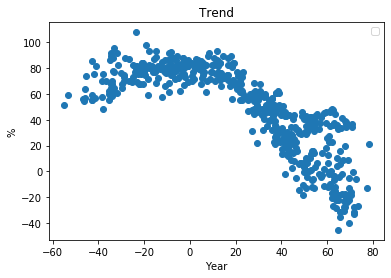

In [7]:
#build a scatterplot showing Temperature (F) vs. Latitude. This means set T to y and L to x. 
temperature1 = city_info_df["temperature"]
latitude1 = city_info_df["latitude"]

plt.scatter(latitude1, temperature1)



plt.title("Trend")
plt.xlabel("Year")
plt.ylabel("%")
legend = ["latitude", "longitude"] 
plt.legend(loc="best")
plt.grid()

#plt.savefig('Output/Trend.png')

plt.show()


#plt.scatter(cpi_df_yearly.index, gdp_df_yearly.loc[:, "Annual (Adjusted) %"], marker="o", facecolors="green", edgecolors="black", alpha=0.75, label='GDP')

In [8]:

# set up lists to hold reponse info
#lat = []
#temp = []

# Loop through the list of cities and perform a request for data on each
#for city in cities:
    #response = requests.get(query_url + city).json()
    #lat.append(response['coord']['lat'])
    #temp.append(response['main']['temp'])

#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")

# put try and except sldkjflsdjk



In [9]:
#turn result into a df
#result_df = pd.DataFrame(result)
#print(result_df)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#saving dataframe to a csv

city_info_df.to_csv(output_data_file,index=False)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots


In [11]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression